In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from urllib.request import urlopen
import squarify
import folium
import json
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Importation des datasets

In [49]:
Data = pd.read_csv('valeursfoncieres-2022.txt', sep='|')
Data2019 = pd.read_csv('valeursfoncieres-2019.txt', sep='|')

## Visualisation du dataset non nettoyé

In [50]:
Data

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,140.0,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/12/2022,Vente,...,NaN,1,4.0,Local industriel. commercial ou assimilé,NaN,327.0,0.0,NaN,NaN,NaN
3803881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/12/2022,Vente,...,NaN,2,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
3803882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/12/2022,Vente,...,NaN,2,2.0,Appartement,NaN,40.0,3.0,NaN,NaN,NaN
3803883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/12/2022,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN


## Nettoyage de la donnée

In [51]:
columns_to_keep = ['Date mutation','Nature mutation','Valeur fonciere','Code postal','Commune','Code departement','Code commune','Nombre de lots','Code type local','Type local','Surface reelle bati','Nombre pieces principales','Surface terrain']
Data['Date mutation'] = pd.to_datetime(Data['Date mutation'])
Data['Code departement'] = Data['Code departement'].astype(str)
Data = Data[columns_to_keep]

Data = Data.dropna()
Data['Valeur fonciere'] = pd.to_numeric(Data['Valeur fonciere'].str.replace(',', '.'))
Data

,Date mutation,Nature mutation,Valeur fonciere,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
5,2022-06-01,Vente,255000.0,1560.0,MANTENAY-MONTLIN,1,230,0,1.0,Maison,108.0,5.0,649.0
8,2022-03-01,Vente,525000.0,1390.0,SAINT-ANDRE-DE-CORCY,1,333,0,4.0,Local industriel. commercial ou assimilé,424.0,0.0,628.0
9,2022-03-01,Vente,525000.0,1390.0,SAINT-ANDRE-DE-CORCY,1,333,0,2.0,Appartement,126.0,4.0,628.0
13,2022-03-01,Vente,140000.0,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,100.0,4.0,796.0
21,2022-10-01,Vente,580000.0,1500.0,AMBRONAY,1,7,0,3.0,Dépendance,0.0,0.0,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803693,2022-12-28,Vente,12281000.0,75011.0,PARIS 11,75,111,0,2.0,Appartement,78.0,3.0,265.0
3803694,2022-12-28,Vente,12281000.0,75011.0,PARIS 11,75,111,0,2.0,Appartement,17.0,1.0,265.0
3803695,2022-12-28,Vente,12281000.0,75011.0,PARIS 11,75,111,0,2.0,Appartement,49.0,3.0,265.0
3803705,2022-12-30,Vente,3100000.0,75012.0,PARIS 12,75,112,0,4.0,Local industriel. commercial ou assimilé,709.0,0.0,258.0


## Argent total dépensé par mois selon les types de mutation pendant l'année

In [52]:
MUTATIONS = Data['Nature mutation'].unique()
def plotMutations(mut, data, ax):

    for m in MUTATIONS:
        temp = data[data['Nature mutation'] == m]
        result = temp.groupby(temp['Date mutation'].dt.to_period("M"))['Valeur fonciere'].sum()
        result.index = result.index.to_timestamp()
        x = result.index
        y = result.values
        
        if m == mut:
            ax.plot(x, y, color="#0b53c1", lw=2.4, zorder=10)
            ax.scatter(x, y, fc="w", ec="#0b53c1", s=60, lw=2.4, zorder=12)
            ax.autoscale()    
        else:
            ax.plot(x, y, color="#BFBFBF", lw=1.5)
    
    ax.set_title(mut, fontfamily="DejaVu Sans", fontsize=14, fontweight=500)
    return ax

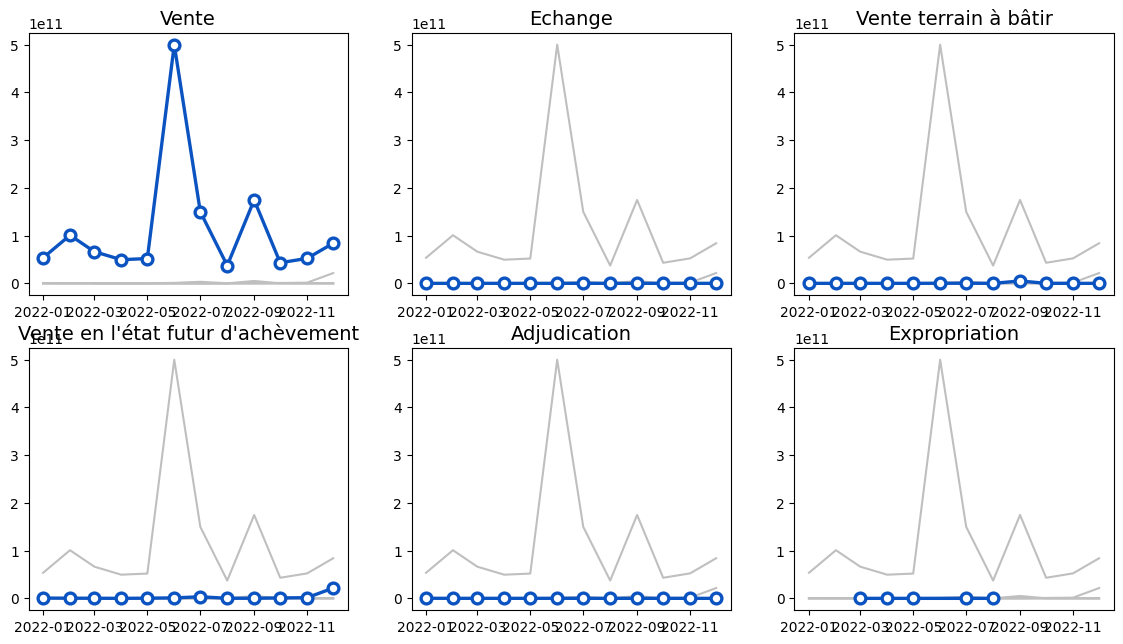

In [53]:
fig, axes = plt.subplots(2, 3, figsize=(14, 7.5))
for idx, (ax, mut) in enumerate(zip(axes.ravel(), MUTATIONS)):
    # Only annotate the first panel
    annotate = idx == 0
    plotMutations(mut, Data, ax)

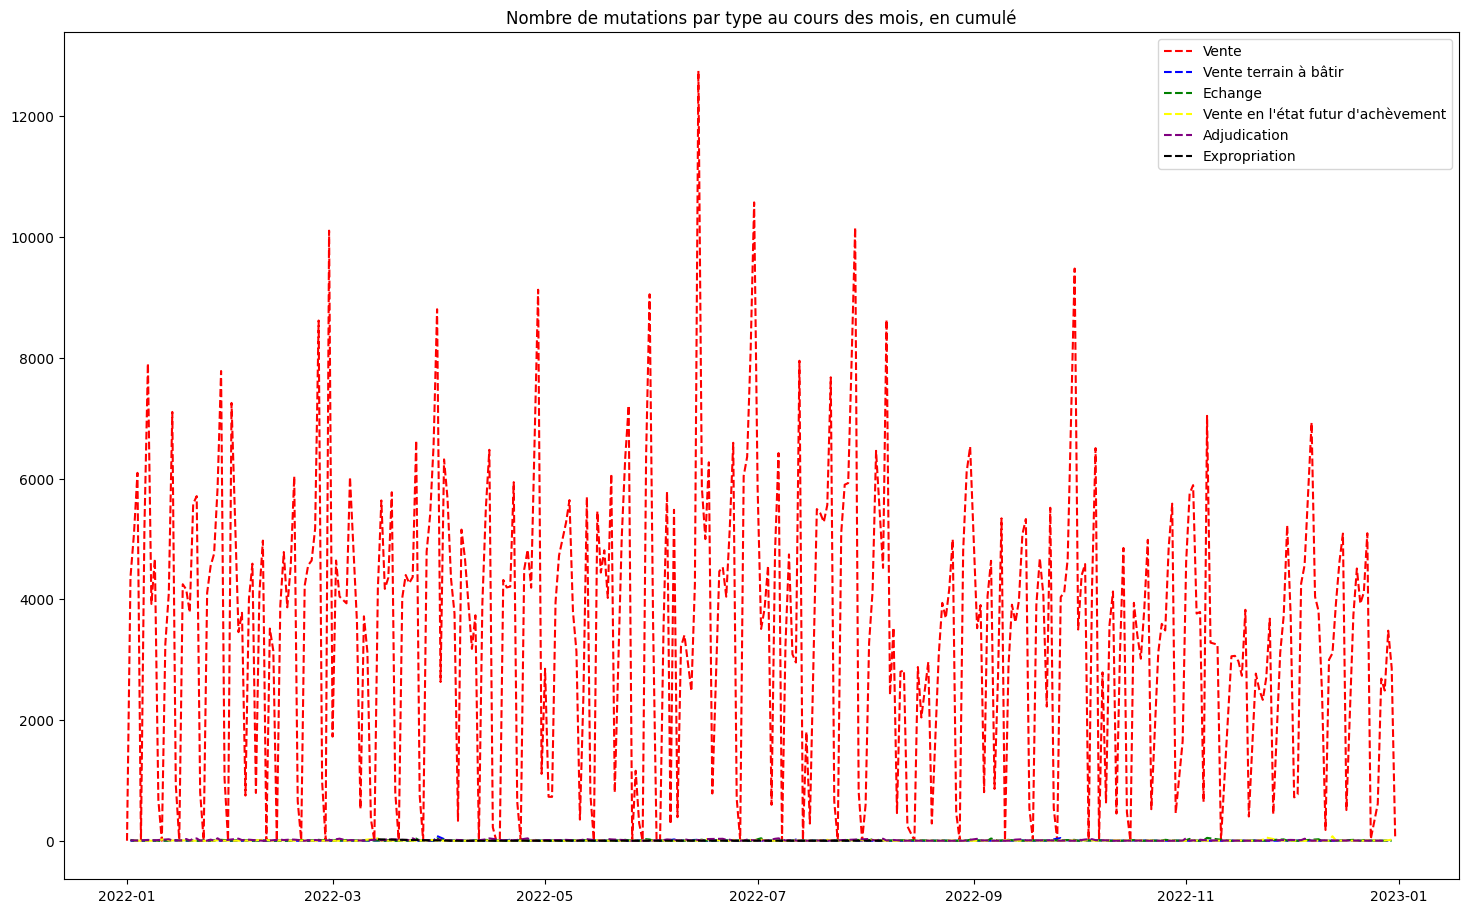

In [54]:
data1 = Data[Data['Nature mutation'] =='Vente'] 
data1 = data1.groupby(by='Date mutation',sort='Date mutation')['Valeur fonciere'].count()


data2 = Data[Data['Nature mutation'] =='Vente terrain à bâtir'] 
data2 = data2.groupby(by='Date mutation',sort='Date mutation')['Valeur fonciere'].count()


data3 = Data[Data['Nature mutation'] =='Echange'] 
data3 = data3.groupby(by='Date mutation',sort='Date mutation')['Valeur fonciere'].count()


data4 = Data[Data['Nature mutation'] =="Vente en l'état futur d'achèvement"] 
data4 = data4.groupby(by='Date mutation',sort='Date mutation')['Valeur fonciere'].count()


data5 = Data[Data['Nature mutation'] =='Adjudication'] 
data5 = data5.groupby(by='Date mutation',sort='Date mutation')['Valeur fonciere'].count()


data6 = Data[Data['Nature mutation'] =='Expropriation'] 
data6 = data6.groupby(by='Date mutation',sort='Date mutation')['Valeur fonciere'].count()


plt.figure(figsize=(18,11))
plt.plot(data1.index, data1.values, "r--", color="red")
plt.plot(data2.index, data2.values, "r--", color="blue")
plt.plot(data3.index, data3.values, "r--", color="green")
plt.plot(data4.index, data4.values, "r--", color="yellow")
plt.plot(data5.index, data5.values, "r--", color="purple")
plt.plot(data6.index, data6.values, "r--", color="black")
plt.legend(['Vente','Vente terrain à bâtir', 'Echange',"Vente en l'état futur d'achèvement",'Adjudication','Expropriation'])
plt.title('Nombre de mutations par type au cours des mois, en cumulé')
plt.show()

## Nombre et répartitions des différents types

Text(0.5, 1.0, 'Nombre de mutations par type')

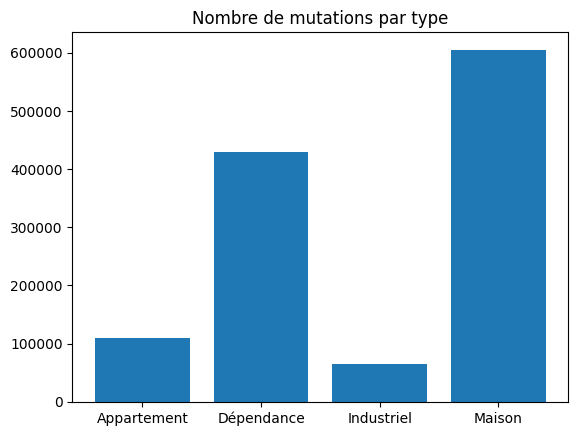

In [55]:
df = Data.groupby(['Type local'])['Type local'].count()

plt.bar(df.index, df.values)
bars = ['Appartement', 'Dépendance', 'Industriel', 'Maison']
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.title('Nombre de mutations par type')

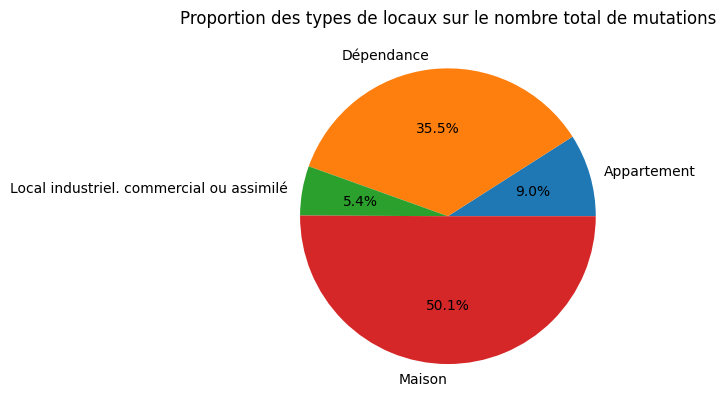

In [56]:
fig, ax = plt.subplots()
ax.pie(df, labels=mutations_par_type.index, autopct='%1.1f%%')
ax.set_title('Proportion des types de locaux sur le nombre total de mutations')

plt.show()

## Répartition des types de biens suivant différents caractères

Text(0.5, 1.0, 'Répartition des types de locaux selon la surface de leur terrain')

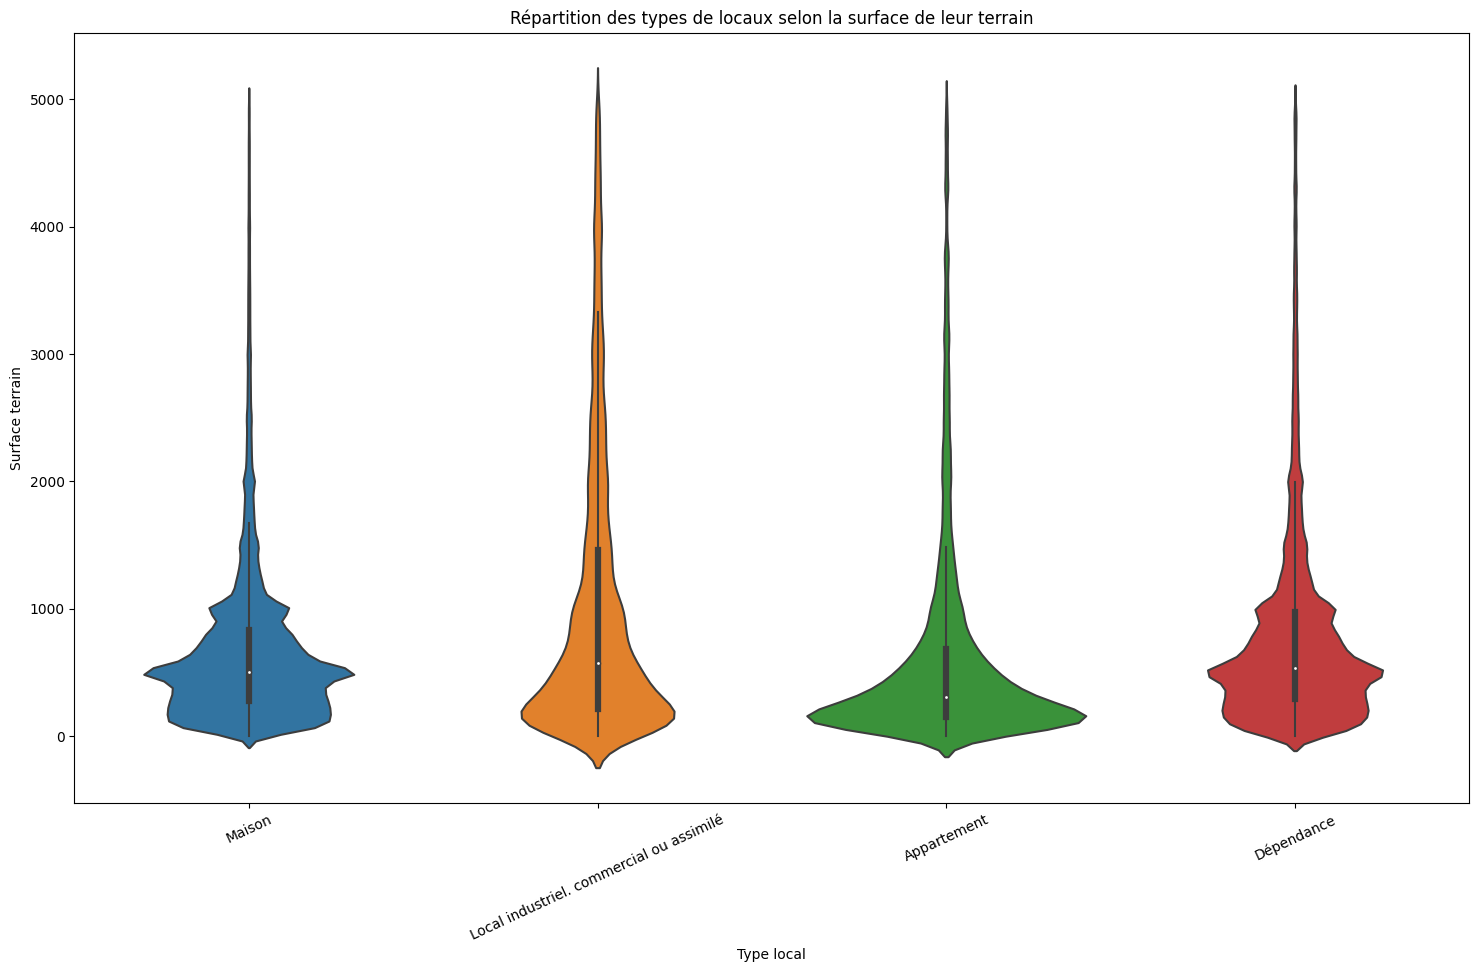

In [58]:
df=Data[Data["Surface terrain"]< 5000]
plt.figure(figsize=(18,10))
plt.xticks(rotation=25)
sbn.violinplot(x = "Type local",y="Surface terrain", data=df)
plt.title('Répartition des types de locaux selon la surface de leur terrain')

Text(0.5, 1.0, 'Répartition des types de locaux selon leur surface réelle bâtie')

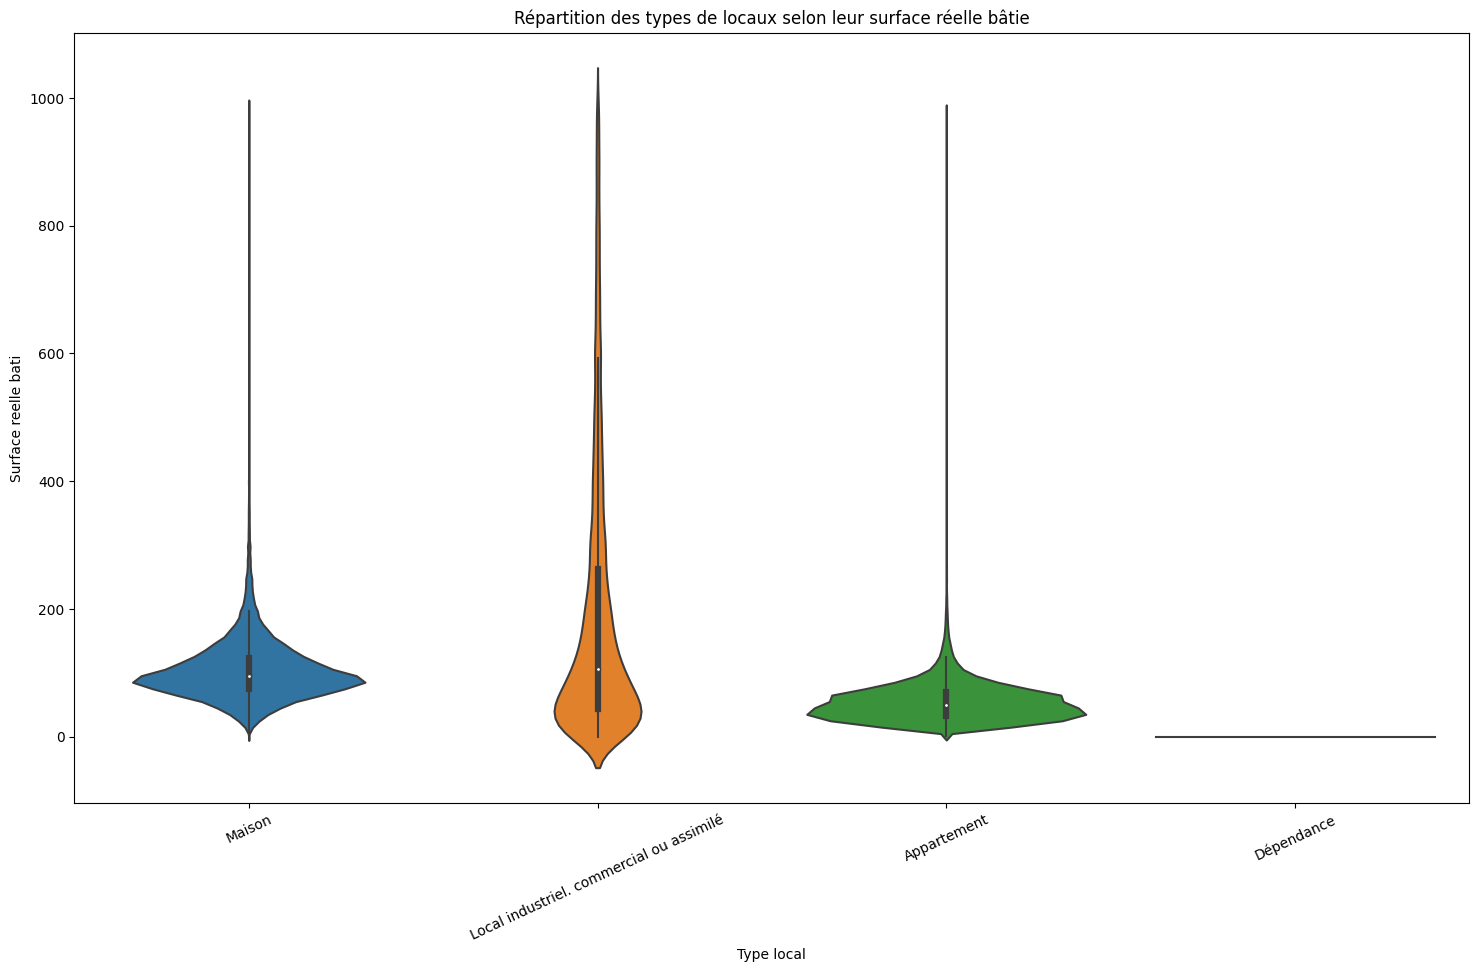

In [59]:
df=Data[(Data["Surface reelle bati"]< 1000) & (Data["Surface reelle bati"].notna())]
plt.figure(figsize=(18,10))
plt.xticks(rotation=25)
sbn.violinplot(x = "Type local",y="Surface reelle bati", data=df)
plt.title('Répartition des types de locaux selon leur surface réelle bâtie')

Text(0.5, 1.0, 'Répartition des types de locaux selon leur valeur foncière')

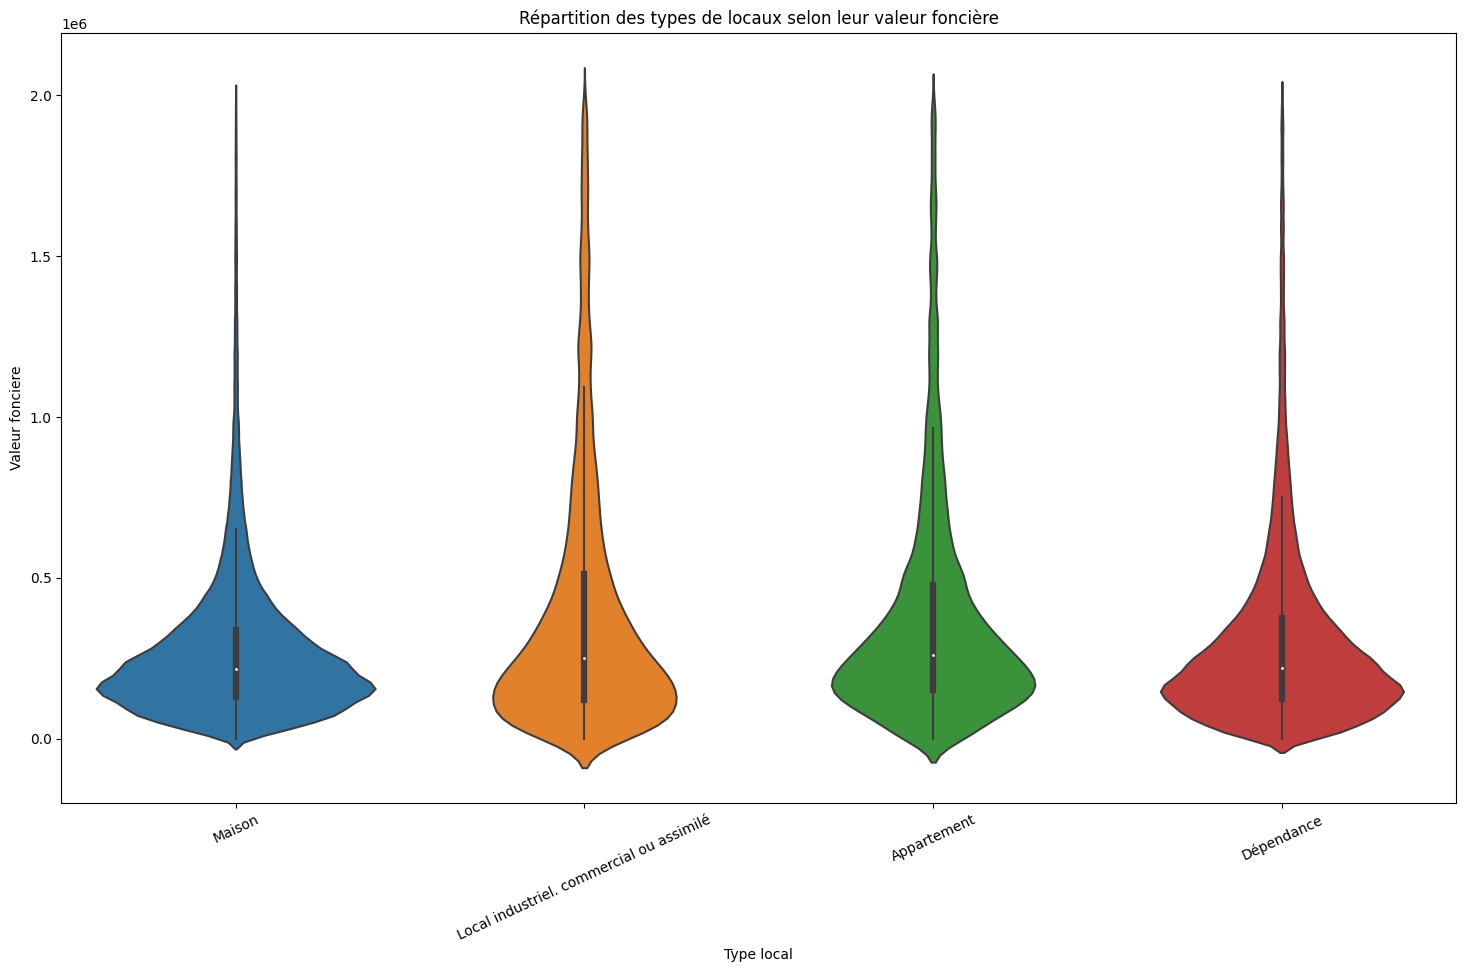

In [62]:
df = Data[Data['Valeur fonciere'] < 2000000]
plt.figure(figsize=(18,10))
plt.xticks(rotation=25)
sbn.violinplot(x="Type local",y="Valeur fonciere",data=df)
plt.title('Répartition des types de locaux selon leur valeur foncière')

## Analyse des données par département 

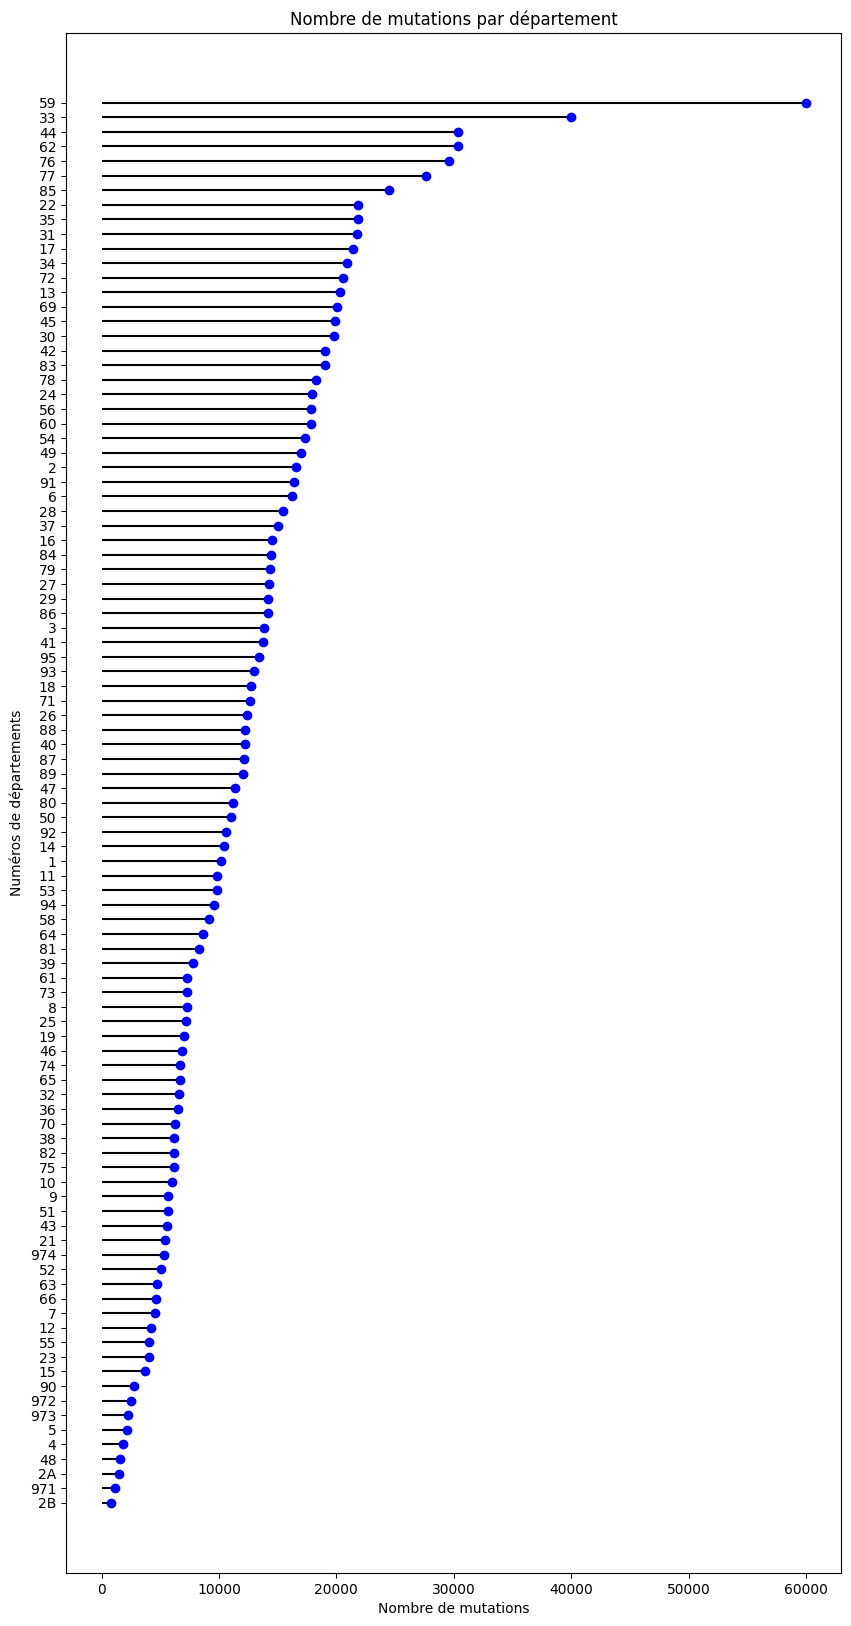

In [67]:
df = Data.groupby(['Code departement'])['Nature mutation'].count().sort_values(ascending=True)
plt.figure(figsize=(10,20))

plt.hlines(y=df.index, xmin=0, xmax=df.values, color='black')
plt.plot(df.values, df.index, "o", color="blue")
 
# Add titles and axis names
#plt.yticks(data.index, data.index)
plt.title('Nombre de mutations par département')
plt.xlabel('Nombre de mutations')
plt.ylabel('Numéros de départements')
plt.show()



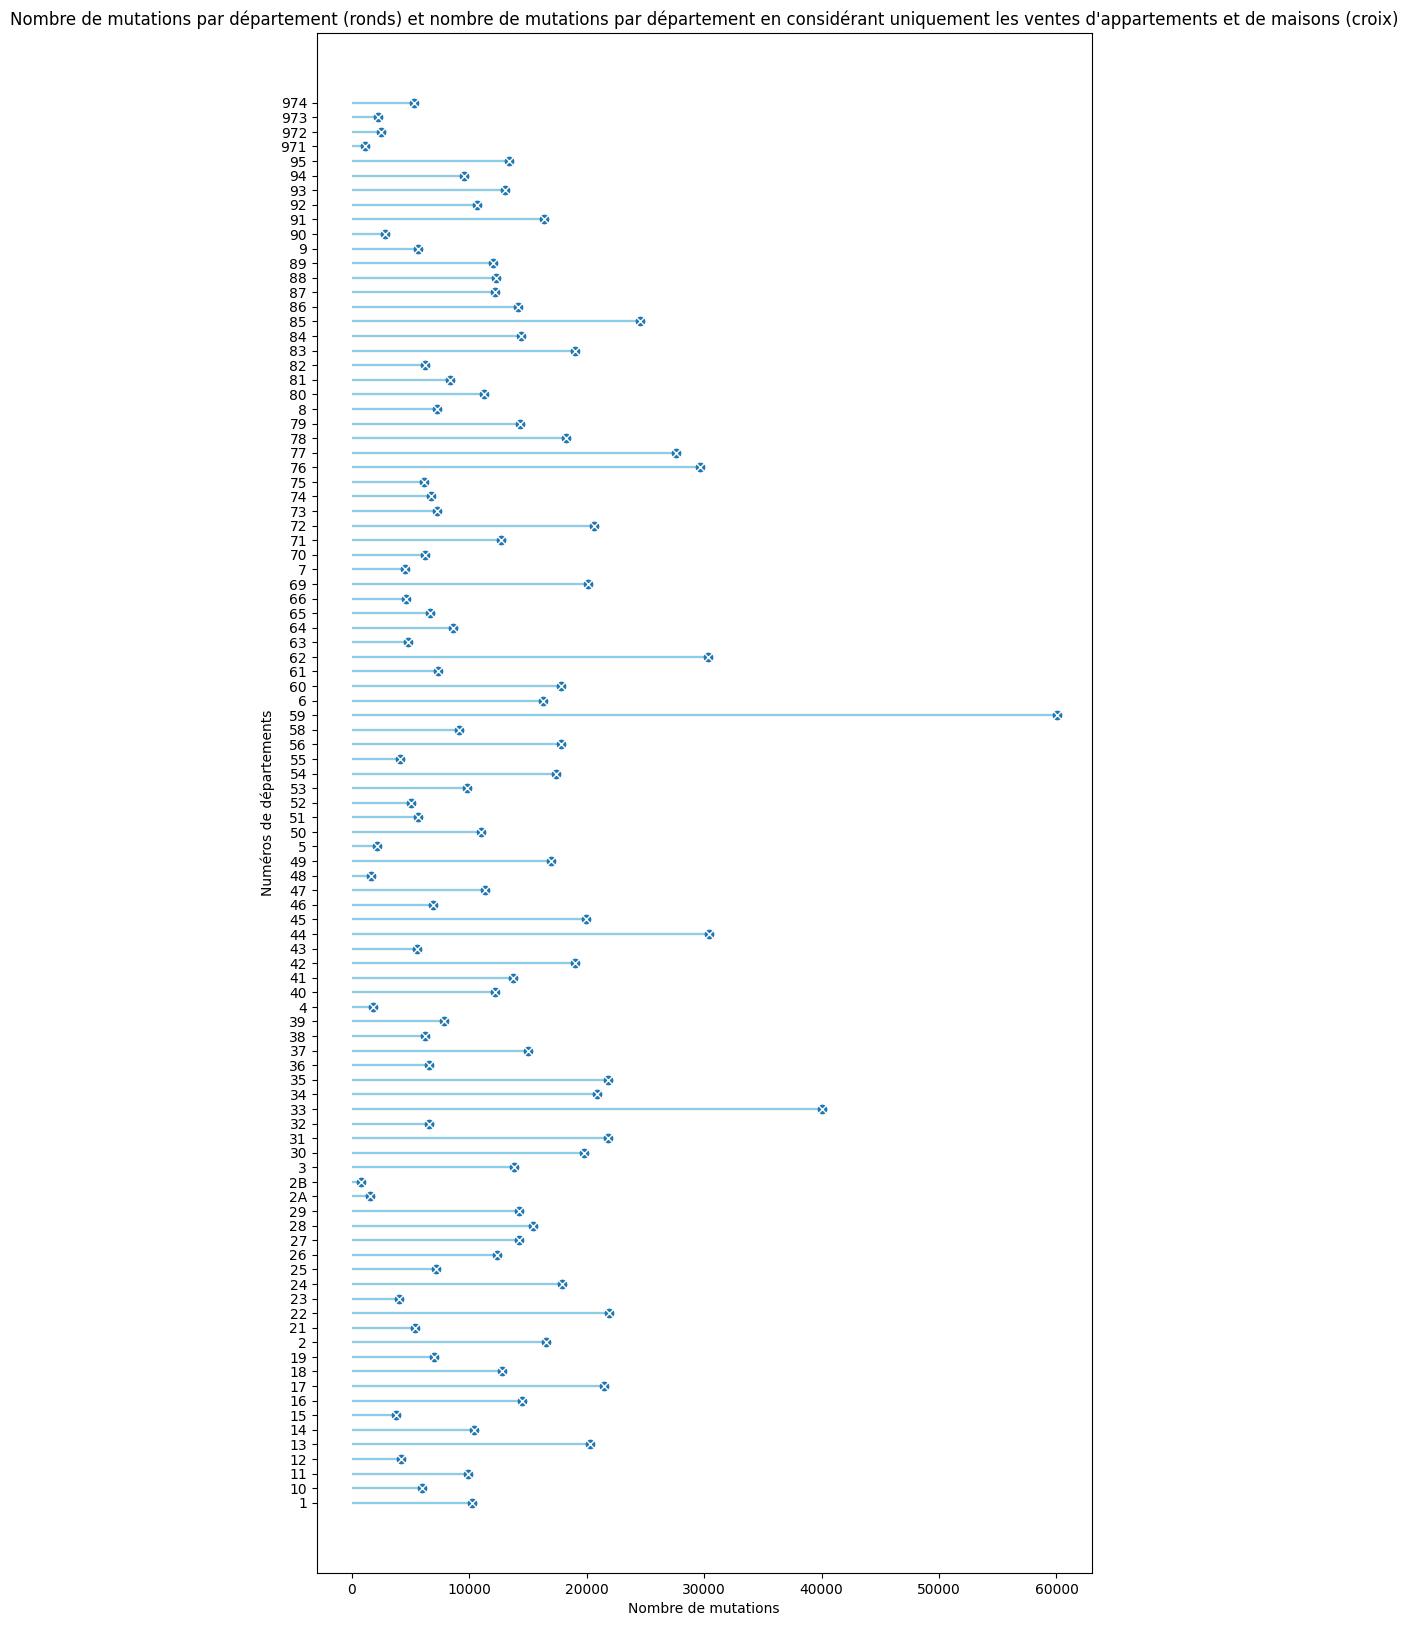

In [69]:
df1 = Data.groupby(['Code departement'])['Nature mutation'].count()

df = Data[((Data['Nature mutation']=='Vente') & ((Data['Type local'] == 'Maison') | (Data['Type local'] == 'Appartement')))]
df = Data.groupby(['Code departement'])['Nature mutation'].count()
plt.figure(figsize=(10,20))

plt.hlines(y=df1.index, xmin = 0, xmax = df1.values, color='red')
plt.hlines(y=df.index, xmin=0, xmax=df.values, color='skyblue')
plt.plot(df.values, df.index, "o")
plt.plot(df1.values, df1.index, "x", color="white")
 
# Add titles and axis names
#plt.yticks(data.index, data.index)
plt.title("Nombre de mutations par département (ronds) et nombre de mutations par département en considérant uniquement les ventes d'appartements et de maisons (croix)")
plt.xlabel('Nombre de mutations')
plt.ylabel('Numéros de départements')
#data.plot.barh()
plt.show()


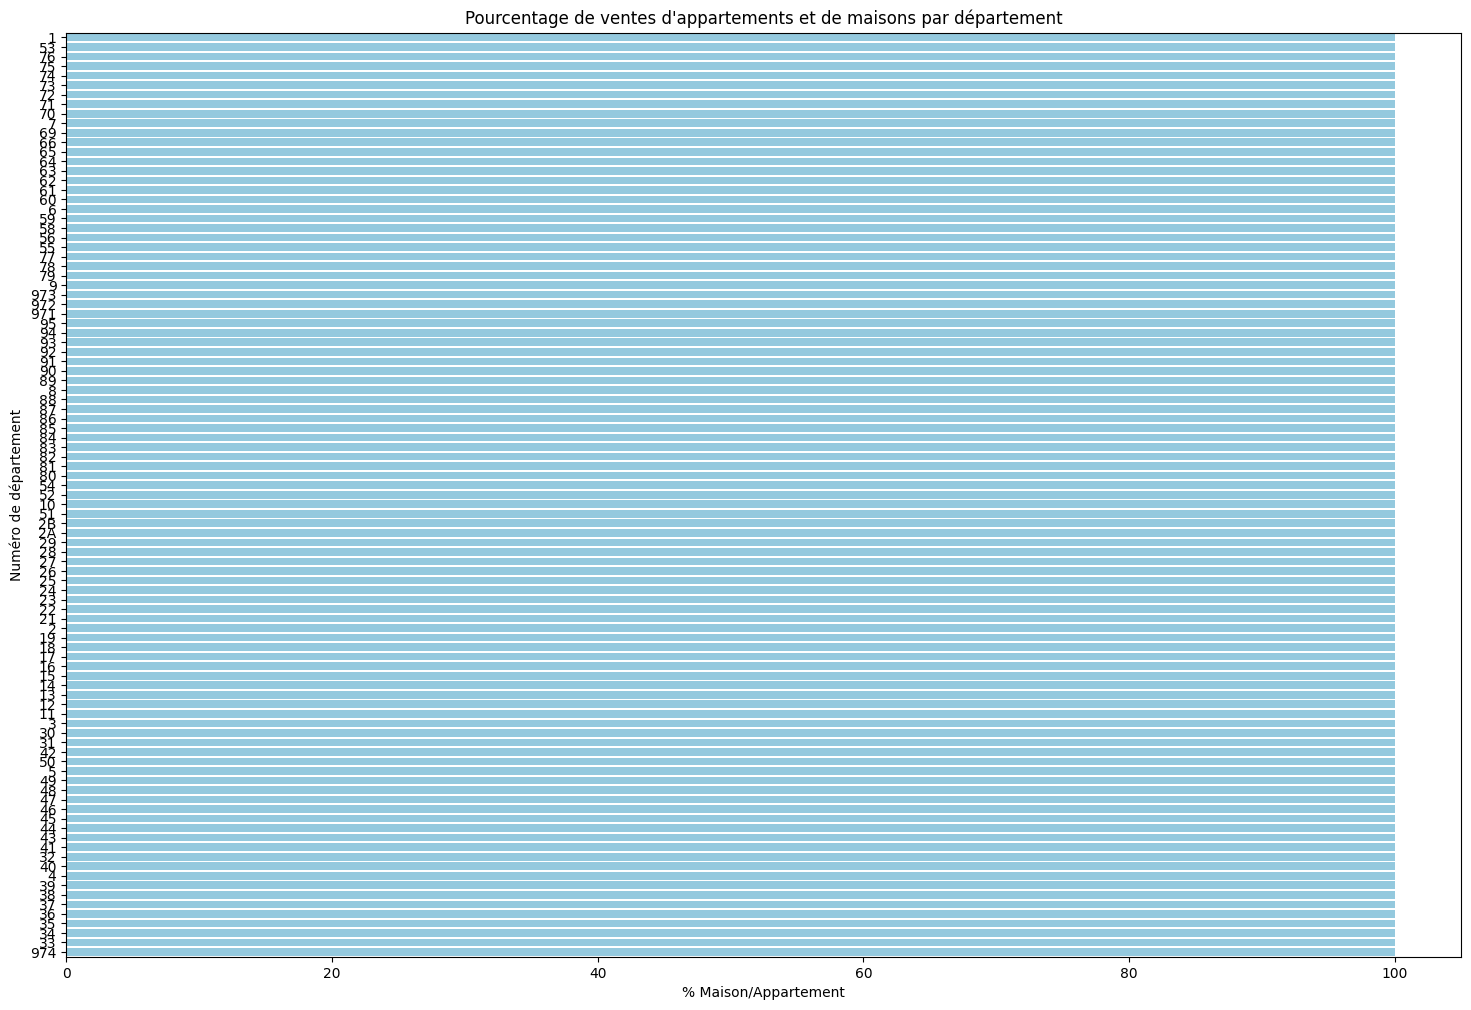

In [74]:
df_filtered = Data.loc[(Data['Nature mutation'] == 'Vente') & (Data['Type local'].isin(['Maison', 'Appartement']))]
df_mutations = df_filtered.groupby(['Code departement'])['Nature mutation'].count().reset_index()
df_mutations = df_mutations.sort_values(by='Nature mutation', ascending=False)
df_filtered2 = df_filtered.groupby(['Code departement', 'Type local'])['Type local'].count().unstack()
df_filtered2 = df_filtered2.fillna(0)
df_filtered2['Total'] = df_filtered2.sum(axis=1)
df_filtered2['% Maison/Appartement'] = ((df_filtered2['Maison'] + df_filtered2['Appartement']) / df_filtered2['Total']) * 100

# Trier les départements par pourcentage de ventes d'appartements et de maisons décroissant
df_filtered2 = df_filtered2.sort_values(by='% Maison/Appartement', ascending=False)

# Créer le graphique
fig, ax = plt.subplots(figsize=(18, 12))
sbn.barplot(x='% Maison/Appartement', y=df_filtered2.index, data=df_filtered2, color='skyblue')
ax.set_title("Pourcentage de ventes d'appartements et de maisons par département")
ax.set_xlabel('% Maison/Appartement')
ax.set_ylabel('Numéro de département')

plt.show()


In [86]:
myscale = None

def mapping_france_folium(data):
    map = folium.Map(location=[48.862, 2.346], zoom_start = 5)
    departments = f"https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
    d = {'Code': data.index, 'Valeur': np.log(data.values)}
    da = pd.DataFrame(d)

    folium.Choropleth(geo_data=departments, 
    data=da, 
    columns=['Code', 'Valeur'], 
    key_on='properties.code',
    fill_color= "PuRd",
    fill_opacity=1,
    line_opacity=.1).add_to(map)
    
    folium.LayerControl().add_to(map)
    return map

def mapping_Paris_circle(data, bigNumbers = False):
    map = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
    arr = json.load(open("arrondissements.geojson"))
    d = {'Code': data.index, 'Valeur': data.values}
    da = pd.DataFrame(d)
    for a in arr["features"]:
        prop = a["properties"]
        temp = da[da['Code'] == prop["c_arinsee"] - 100]
        temp = temp['Valeur'].values
        folium.Circle(prop["geom_x_y"], 
        fill=True,
        popup = prop["l_ar"],
        radius = (temp[0]/1) if not bigNumbers else temp[0]/9000000).add_to(map)
    return map


def mapping_Paris(data):
    map = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
    arr = json.load(open("arrondissements.geojson"))
    d = {'Code': data.index + 100, 'Valeur': np.log(data.values)}
    da = pd.DataFrame(d)
    da = da[(da['Code'] >= 75100) & (da['Code'] <= 75120)]
    myscale = np.linspace(da['Valeur'].min(), da['Valeur'].max(), 10)
    folium.Choropleth(geo_data=arr, 
            data=da, 
            columns=['Code', 'Valeur'], 
            key_on='properties.c_arinsee',
            fill_color= "PuRd",
            threshold_scale=myscale,
            fill_opacity=0.8,
            line_opacity=.1).add_to(map)
        
    
    folium.LayerControl().add_to(map)
    return map
def mapping_Bordeaux(data):
    map = folium.Map(location = [44.837789, -0.57918], zoom_start = 12)
    arr = json.load(open("BORDEAUX_quartiers.geojson"))
    d = {'Code': data.index + 33000, 'Valeur': np.log(data.values)}
    da = pd.DataFrame(d)
    da = da[(da['Code'] >= 330001) & (da['Code'] <= 330040)]
    da['Code'] = da['Code'].astype(int).astype(str)
    folium.Choropleth(geo_data=arr, 
            data=da, 
            columns=['Code', 'Valeur'], 
            key_on='properties.code',
            fill_color= "PuRd",
            threshold_scale=myscale,
            fill_opacity=0.8,
            line_opacity=.1).add_to(map)
    
    folium.LayerControl().add_to(map)
    return map

def mapping_Toulouse(data):
    map = folium.Map(location = [43.604462, 1.444246], zoom_start = 12)
    arr = json.load(open("quartiers.json"))
    d = {'Code': data.index + 31000, 'Valeur': np.log(data.values)}
    da = pd.DataFrame(d)
    da = da[(da['Code'] >= 310001) & (da['Code'] <= 310080)]
    da['Code'] = da['Code'].astype(int).astype(str)
    folium.Choropleth(geo_data=arr, 
            data=da, 
            columns=['Code', 'Valeur'], 
            key_on='properties.code',
            fill_color= "PuRd",
            threshold_scale=myscale,
            fill_opacity=0.8,
            line_opacity=.1).add_to(map)
    
    folium.LayerControl().add_to(map)
    return map



In [87]:
data = Data.groupby(['Code departement'])['Nature mutation'].count()
map = mapping_france_folium(data)
map